In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

%config InlineBackend.figure_format = 'retina' # 폰트를 선명하게~


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
result=pd.read_csv("C:\\Users\\minir\\OneDrive\\바탕 화면\\지치안\\날씨포함2022까지.csv")

C:\Users\minir\AppData\Local\Temp\ipykernel_13536\2216055698.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result=pd.read_csv("C:\\Users\\minir\\OneDrive\\바탕 화면\\지치안\\날씨포함2022까지.csv")


In [3]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495362 entries, 0 to 495361
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   RECV_DEPT_NM   495362 non-null  object 
 1   RECV_CPLT_DM   495362 non-null  object 
 2   NPA_CL         495362 non-null  int64  
 3   EVT_STAT_CD    495362 non-null  int64  
 4   EVT_CL_CD      495362 non-null  int64  
 5   RPTER_SEX      495362 non-null  object 
 6   HPPN_PNU_ADDR  495362 non-null  object 
 7   HPPN_X         495343 non-null  float64
 8   HPPN_Y         495343 non-null  float64
 9   SME_EVT_YN     161896 non-null  object 
 10  요일             495362 non-null  object 
 11  구분             495362 non-null  object 
 12  시/군/구          495362 non-null  object 
 13  날씨             485806 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 52.9+ MB


In [4]:
result.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별","HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)

In [5]:
result

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구,날씨
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시,맑음
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시,맑음
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동,NaN
3,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,천안시,맑음
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,유성구,맑음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495357,대전청,2023-01-18 23:23:38,13,10,406,1.0,대전광역시 중구 문화동 (행정:문화1동 ) 1-266,127.414486,36.321280,Y,Wednesday,대전,중구,NaN
495358,충남청,2023-01-18 23:32:32,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741950,36.868136,Y,Wednesday,충남,당진시,NaN
495359,충남청,2023-01-18 23:34:30,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741930,36.868214,Y,Wednesday,충남,당진시,NaN
495360,대전청,2023-01-18 23:35:52,13,10,406,2.0,대전광역시 서구 월평동 (월평1동 ) 1526,127.357785,36.355010,NaN,Wednesday,대전,서구,NaN


In [6]:
result["사건종별코드"].value_counts()

401    305071
406     80984
402     69620
403     39608
405        55
404        24
Name: 사건종별코드, dtype: int64

In [7]:
result["날씨"].value_counts(dropna=False)

맑음      230444
구름많음    111933
흐림      111411
비옴       32018
NaN       9556
Name: 날씨, dtype: int64

In [8]:
result["날씨"]=result["날씨"].replace({"맑음":1,"구름많음":2,"흐림":3, "비옴":4})

In [9]:
result.value_counts("날씨")

날씨
1.0    230444
2.0    111933
3.0    111411
4.0     32018
dtype: int64

In [10]:
result

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구,날씨
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시,1.0
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시,1.0
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동,NaN
3,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,천안시,1.0
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,유성구,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495357,대전청,2023-01-18 23:23:38,13,10,406,1.0,대전광역시 중구 문화동 (행정:문화1동 ) 1-266,127.414486,36.321280,Y,Wednesday,대전,중구,NaN
495358,충남청,2023-01-18 23:32:32,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741950,36.868136,Y,Wednesday,충남,당진시,NaN
495359,충남청,2023-01-18 23:34:30,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741930,36.868214,Y,Wednesday,충남,당진시,NaN
495360,대전청,2023-01-18 23:35:52,13,10,406,2.0,대전광역시 서구 월평동 (월평1동 ) 1526,127.357785,36.355010,NaN,Wednesday,대전,서구,NaN


<AxesSubplot:xlabel='날씨', ylabel='사건종별코드'>

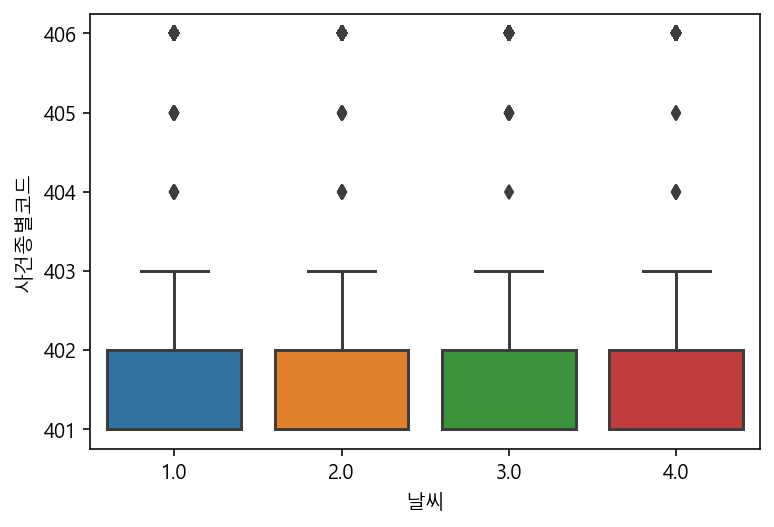

In [11]:
sns.boxplot(x="날씨",y="사건종별코드", data=result)

In [12]:
dev=result[["구분","접수완료일시","사건종별코드","날씨"]]

In [13]:
dev["연도"]=dev["접수완료일시"].str.split("-").str[0]

C:\Users\minir\AppData\Local\Temp\ipykernel_13536\928936298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev["연도"]=dev["접수완료일시"].str.split("-").str[0]


In [14]:
dev["월"]=dev["접수완료일시"].str.split("-").str[1]

C:\Users\minir\AppData\Local\Temp\ipykernel_13536\4281491105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev["월"]=dev["접수완료일시"].str.split("-").str[1]


In [15]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495362 entries, 0 to 495361
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   구분      495362 non-null  object 
 1   접수완료일시  495362 non-null  object 
 2   사건종별코드  495362 non-null  int64  
 3   날씨      485806 non-null  float64
 4   연도      495362 non-null  object 
 5   월       495362 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 22.7+ MB


In [16]:
dev=dev.set_index("연도")

In [17]:
dev["날씨"]=dev["날씨"].replace({0.0:5})

In [18]:
dev=dev.reset_index()

In [19]:
dev["시간"]=dev["접수완료일시"].str.split(" ").str[1]

In [20]:
dev["시간"]=dev["시간"].str.split(":").str[0]

In [21]:
dev["구분"]=dev["구분"].replace({"충남":1,"세종":2,"대전":3})

In [22]:
dev2=dev[["연도","월","시간","구분","사건종별코드","날씨"]]

In [23]:
dev2.dropna(inplace=True)

C:\Users\minir\AppData\Local\Temp\ipykernel_13536\1717197210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev2.dropna(inplace=True)


In [24]:
dev2["연도"]=dev2["연도"].astype(int)
dev2["월"]=dev2["월"].astype(int)
dev2["시간"]=dev2["시간"].astype(int)



C:\Users\minir\AppData\Local\Temp\ipykernel_13536\2186277956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev2["연도"]=dev2["연도"].astype(int)
C:\Users\minir\AppData\Local\Temp\ipykernel_13536\2186277956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev2["월"]=dev2["월"].astype(int)
C:\Users\minir\AppData\Local\Temp\ipykernel_13536\2186277956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [25]:
dev2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485806 entries, 0 to 489296
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연도      485806 non-null  int32  
 1   월       485806 non-null  int32  
 2   시간      485806 non-null  int32  
 3   구분      485806 non-null  int64  
 4   사건종별코드  485806 non-null  int64  
 5   날씨      485806 non-null  float64
dtypes: float64(1), int32(3), int64(2)
memory usage: 20.4 MB


In [26]:
dev2["사건종별코드"].value_counts(dropna=False)

401    299246
406     79273
402     68362
403     38848
405        55
404        22
Name: 사건종별코드, dtype: int64

In [27]:
pd.crosstab(dev2["사건종별코드"],dev2["날씨"])

날씨,1.0,2.0,3.0,4.0
사건종별코드,,,,
401,142248,68709,68513,19776
402,31677,15410,15372,5903
403,18878,9404,8725,1841
404,9,6,1,6
405,24,11,17,3
406,37608,18393,18783,4489


In [28]:
pd.crosstab(dev2["사건종별코드"], dev2["날씨"], normalize=True)*100

날씨,1.0,2.0,3.0,4.0
사건종별코드,,,,
401,29.280824,14.143300,14.102955,4.070761
402,6.520504,3.172048,3.164226,1.215094
403,3.885913,1.935752,1.795984,0.378958
404,0.001853,0.001235,0.000206,0.001235
405,0.004940,0.002264,0.003499,0.000618
406,7.741362,3.786079,3.866358,0.924031


In [29]:
import datetime
import time

In [30]:
dev

,연도,구분,접수완료일시,사건종별코드,날씨,월,시간
0,2020,1,2020-01-01 00:03:11,406,1.0,01,00
1,2020,1,2020-01-01 00:18:08,403,1.0,01,00
2,2020,2,2020-01-01 00:20:01,406,NaN,01,00
3,2020,1,2020-01-01 00:20:04,402,1.0,01,00
4,2020,3,2020-01-01 00:21:35,401,1.0,01,00
...,...,...,...,...,...,...,...
495357,2023,3,2023-01-18 23:23:38,406,NaN,01,23
495358,2023,1,2023-01-18 23:32:32,401,NaN,01,23
495359,2023,1,2023-01-18 23:34:30,401,NaN,01,23
495360,2023,3,2023-01-18 23:35:52,406,NaN,01,23


In [31]:
dev["접수완료일시"]=dev["접수완료일시"].str.split(":").str[0]

In [32]:
dev3=dev[["구분","접수완료일시","사건종별코드","날씨"]]

In [33]:
dev3=dev3.fillna("0") # 결측치는 0으로 처리

In [34]:
dev3["날씨"]=dev3["날씨"].astype(int)

In [35]:
dev3.value_counts("접수완료일시")

접수완료일시
2022-12-06 08    276
2021-01-21 18    171
2022-12-21 07    165
2020-01-23 16    162
2022-12-06 07    156
                ... 
2022-04-16 05      1
2022-04-14 05      1
2021-10-24 06      1
2021-04-17 02      1
2022-01-07 00      1
Length: 26230, dtype: int64

In [36]:
day=pd.DataFrame(dev3["접수완료일시"].drop_duplicates())

In [37]:
day

,접수완료일시
0,2020-01-01 00
14,2020-01-01 01
31,2020-01-01 02
45,2020-01-01 03
53,2020-01-01 04
...,...
495291,2023-01-18 19
495310,2023-01-18 20
495320,2023-01-18 21
495334,2023-01-18 22


In [38]:
dev_cn=dev3[dev["구분"]==1]

In [39]:
cnday=pd.DataFrame(dev_cn["접수완료일시"].drop_duplicates())

In [40]:
# pd.set_option('display.max_rows', None)

In [41]:
dev_cn.head(100)

,구분,접수완료일시,사건종별코드,날씨
0,1,2020-01-01 00,406,1
1,1,2020-01-01 00,403,1
3,1,2020-01-01 00,402,1
6,1,2020-01-01 00,403,1
7,1,2020-01-01 00,406,1
...,...,...,...,...
141,1,2020-01-01 10,401,2
142,1,2020-01-01 10,401,2
152,1,2020-01-01 10,406,3
153,1,2020-01-01 10,406,2


In [49]:
drop_cn=dev_cn[["접수완료일시","날씨"]].drop_duplicates()

In [47]:
hppn=pd.DataFrame(dev_cn.value_counts("접수완료일시")).sort_values("접수완료일시")

In [51]:
cn=pd.merge(drop_cn, hppn, on="접수완료일시")

In [56]:
cn.rename(columns={0:"발생건수"}, inplace=True)

In [60]:
cn.head(100)

,접수완료일시,날씨,발생건수
0,2020-01-01 00,1,8
1,2020-01-01 01,1,11
2,2020-01-01 02,3,6
3,2020-01-01 03,3,6
4,2020-01-01 04,3,4
...,...,...,...
95,2020-01-03 21,0,9
96,2020-01-03 22,1,9
97,2020-01-03 23,1,14
98,2020-01-04 00,1,11


In [59]:
cn.to_csv("충남데이터_sg.csv")

In [65]:
result[result["구분"]=="대전"].head(500)

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구,날씨
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,유성구,1.0
8,대전청,2020-01-01 00:32:40,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,Wednesday,대전,서구,1.0
9,대전청,2020-01-01 00:35:32,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,Wednesday,대전,유성구,1.0
10,대전청,2020-01-01 00:43:01,13,10,401,1,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN,Wednesday,대전,중구,1.0
19,대전청,2020-01-01 01:17:14,13,10,401,1,대전광역시 중구 대사동(대사동) 64-2,127.431339,36.319196,Y,Wednesday,대전,중구,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,대전청,2020-01-02 18:57:50,13,10,401,3,대전광역시 중구 산성동 767,127.388100,36.309880,N,Thursday,대전,중구,3.0
1275,대전청,2020-01-02 18:57:50,13,10,401,3,대전광역시 중구 산성동 767,127.388100,36.309880,N,Thursday,대전,중구,1.0
1276,대전청,2020-01-02 18:57:50,13,10,401,3,대전광역시 중구 산성동 767,127.388100,36.309880,N,Thursday,대전,중구,1.0
1277,대전청,2020-01-02 19:00:17,13,10,401,1,대전광역시 중구 오류동(오류동) 190-23,127.402306,36.328473,NaN,Thursday,대전,중구,1.0


<AxesSubplot:xlabel='날씨', ylabel='발생건수'>

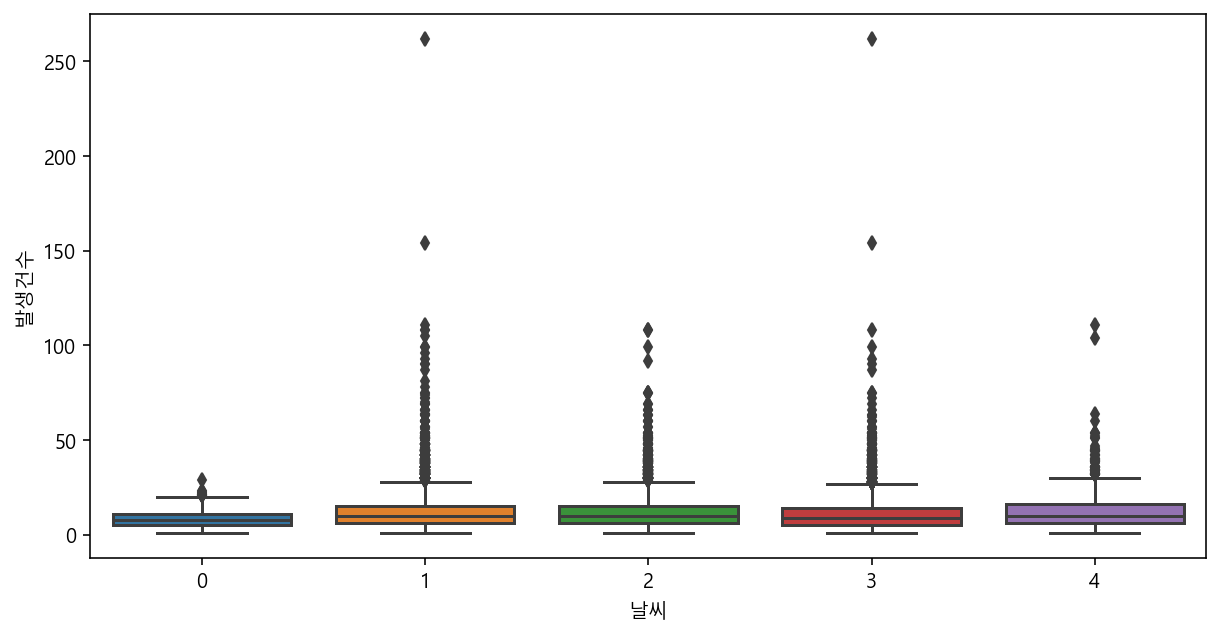

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x="날씨",y="발생건수",data=cn)

In [88]:
n=pd.read_csv("C:\\Users\\minir\\OneDrive\\바탕 화면\\지치안\\전체통계.csv")

In [89]:
n

,접수일시,날씨,구분,신고수
0,2020-01-01 00:00:00,맑음,대전,4
1,2020-01-01 01:00:00,맑음,대전,6
2,2020-01-01 02:00:00,맑음,대전,8
3,2020-01-01 03:00:00,흐림,대전,2
4,2020-01-01 05:00:00,흐림,대전,2
...,...,...,...,...
69560,2022-12-31 19:00:00,맑음,충남,8
69561,2022-12-31 20:00:00,맑음,충남,7
69562,2022-12-31 21:00:00,맑음,충남,15
69563,2022-12-31 22:00:00,맑음,충남,21


In [91]:
n.value_counts("날씨")

날씨
맑음      31508
흐림      16962
구름많음    16476
비옴       4619
dtype: int64

<AxesSubplot:xlabel='날씨', ylabel='신고수'>

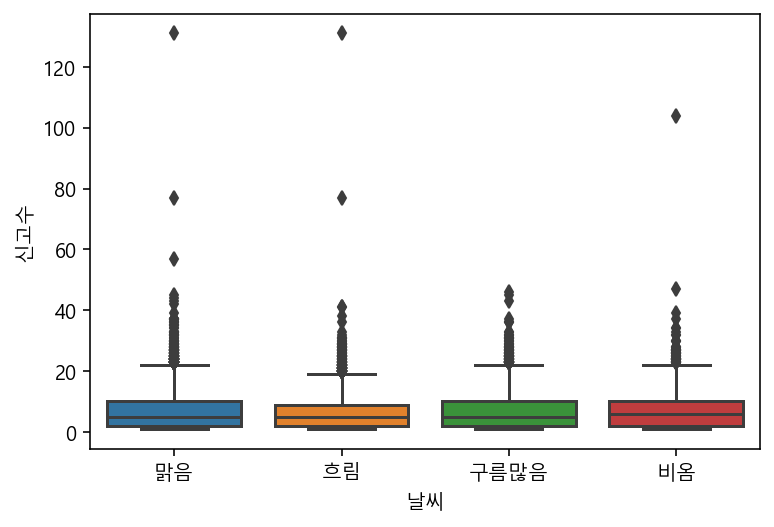

In [93]:
sns.boxplot(x="날씨",y="신고수", data=n) #??????????????????

In [97]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69565 entries, 0 to 69564
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   접수일시    69565 non-null  object
 1   날씨      69565 non-null  object
 2   구분      69565 non-null  object
 3   신고수     69565 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [99]:
pd.read_csv("C:\\Users\\minir\\OneDrive\\문서\\카카오톡 받은 파일\\전국무인교통단속카메라표준데이터_대전.csv")

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,...,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명
0,8,대전광역시,동구,특별시도,NaN,대전로,3.0,대전광역시 동구 대전로 750,대전광역시 동구 중동 75-3,36.326886,...,0,NaN,NaN,NaN,NaN,대전광역시 동구,042-251-4923,2022-09-20,3640000,대전광역시 동구
1,9,대전광역시,동구,구도,NaN,대전천동로,3.0,대전광역시 동구 태전로 18,대전광역시 동구 중동 82-8,36.332118,...,0,NaN,NaN,NaN,NaN,대전광역시 동구,042-251-4923,2022-09-20,3640000,대전광역시 동구
2,10,대전광역시,동구,특별시도,NaN,대전로,3.0,대전광역시 동구 선화로 209,대전광역시 동구 원동 102-13,36.334535,...,0,NaN,NaN,NaN,NaN,대전광역시 동구,042-251-4923,2022-09-20,3640000,대전광역시 동구
3,11,대전광역시,동구,특별시도,NaN,선화로,3.0,대전광역시 동구 중앙로 190,대전광역시 동구 삼성동 273-3,36.330226,...,0,NaN,NaN,NaN,NaN,대전광역시 동구,042-251-4923,2022-09-20,3640000,대전광역시 동구
4,12,대전광역시,동구,특별시도,NaN,용운로,3.0,대전광역시 동구 대전천동로 540,대전광역시 동구 용운동 305-10,36.328936,...,0,NaN,NaN,NaN,NaN,대전광역시 동구,042-251-4923,2022-09-20,3640000,대전광역시 동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20314,G1539,대구광역시,달성군,군도,76번,세천로,1.0,대구광역시 달성군 다사읍 세천로 182-9,대구광역시 달성군 다사읍 세천리 1586,35.874349,...,30,NaN,NaN,2.0,2018.0,대구지방경찰청,053-804-2852,2022-06-10,3480000,대구광역시 달성군
20315,G2042,대구광역시,달성군,군도,15번,비슬로,1.0,대구광역시 달성군 옥포읍 돌미로 2,대구광역시 달성군 옥포읍 강림리 638,35.781212,...,50,NaN,NaN,2.0,2019.0,대구지방경찰청,053-804-2852,2022-06-10,3480000,대구광역시 달성군
20316,G3165,대구광역시,달성군,군도,40번,달구벌대로,2.0,대구광역시 달성군 다사읍 달구벌대로 763,대구광역시 달성군 다사읍 매곡리 895-3,35.861570,...,60,NaN,NaN,NaN,2020.0,대구지방경찰청,053-804-2852,2022-06-10,3480000,대구광역시 달성군
20317,G3291,대구광역시,달성군,시도,138번,테크로중앙대로,1.0,대구광역시 달성군 유가읍 테크노중앙대로 80,대구광역시 달성군 유가읍 금리 1172,35.678292,...,60,NaN,NaN,NaN,2020.0,대구지방경찰청,053-804-2852,2022-06-10,3480000,대구광역시 달성군
